In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [861]:
df = pd.read_csv('raw_data.csv')

In [862]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...","5,15 tỷ",100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...","4,1 tỷ",85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11 tỷ,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...","17,5 tỷ",137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7 tỷ,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


In [863]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      14941 non-null  object
 1   Prices       14941 non-null  object
 2   Area         14941 non-null  object
 3   toFace       14941 non-null  object
 4   type         14941 non-null  object
 5   certificate  14941 non-null  object
 6   width        14941 non-null  object
 7   length       14941 non-null  object
 8   floors       14941 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [864]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_26860\632191419.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')


In [865]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [866]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_26860\686885982.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')


Những giá trị area nào bằng 0 thì chuyển về NaN

In [867]:
df.loc[df.Area==0,'Area']=np.nan

In [868]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### toFace

In [869]:
df['toFace'].unique()

array(['Tây Nam', '_', 'Tây', 'Đông Nam', 'Đông', 'Tây Bắc', 'Bắc',
       'Đông Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [870]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [871]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Type

In [872]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [873]:
df['certificate'].unique()

array(['---', 'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [874]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [875]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,4


### Width and Length

Loại bỏ các từ thừa

In [876]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [877]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [878]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_26860\2836111748.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
C:\Users\PC\AppData\Local\Temp\ipykernel_26860\2836111748.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')


Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [879]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [880]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


### Floors

Các giá trị của biến floors

In [881]:
df['floors'].unique()

array(['4', '1', '3', '2', '6', '---', '5', '8', '7', '10', '33', '9',
       '14', '11', '19', '34', '18', '123', '23', '15', '35', '25', '12',
       '17', '20', '28'], dtype=object)

Chuyển những giá trị '---' thành NaN

In [882]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_26860\4023322969.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')


### Định dạng lại dữ liệu

In [883]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0


In [884]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Sau khi định dạng 

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      14941 non-null  object  
 1   Prices       14875 non-null  float64 
 2   Area         14791 non-null  float64 
 3   toFace       14941 non-null  category
 4   type         14941 non-null  category
 5   certificate  14941 non-null  category
 6   width        12876 non-null  float64 
 7   length       10830 non-null  float64 
 8   floors       14586 non-null  Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 759.5+ KB


In [886]:
df.describe()

,Prices,Area,width,length,floors
count,14875.000000,14791.000000,12876.000000,10830.000000,14586.0
mean,8.378236,87.218493,5.711354,18.190815,2.744344
std,11.268677,63.940995,5.113937,27.314063,1.995086
min,1.000000,0.103000,2.000000,1.000000,1.0
25%,3.600000,60.000000,4.500000,14.000000,2.0
50%,5.250000,80.000000,5.000000,17.500000,3.0
75%,8.800000,100.000000,5.500000,20.000000,3.0
max,315.000000,950.000000,420.000000,2020.000000,123.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [887]:
# df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)
df['Street']=df['Address'].str.split(', ', expand=True)[0]
df['Ward']=df['Address'].str.split(', ', expand=True)[1]
df['District']=df['Address'].str.split(', ', expand=True)[2]

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [888]:
df = df.drop(['Address'], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường Hà Mục,Phường Hòa Thọ Đông,Quận Cẩm Lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,Đường Thi Sách,Phường Hòa Thuận Tây,Quận Hải Châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,Đường Ông Ích Khiêm,Phường Tam Thuận,Quận Thanh Khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,Đường Núi Thành,Phường Hòa Cường Bắc,Quận Hải Châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,Đường Trương Văn Hiến,Phường Khuê Mỹ,Quận Ngũ Hành Sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [889]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [890]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [891]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [892]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = sqrt(area)

In [893]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = np.sqrt(df['Area'])

## Outlier

In [894]:
data = df.copy()

In [895]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
lower_boundary=df['Prices'].mean() - 3* df['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 42.29344192029121


In [896]:
df.loc[(df.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

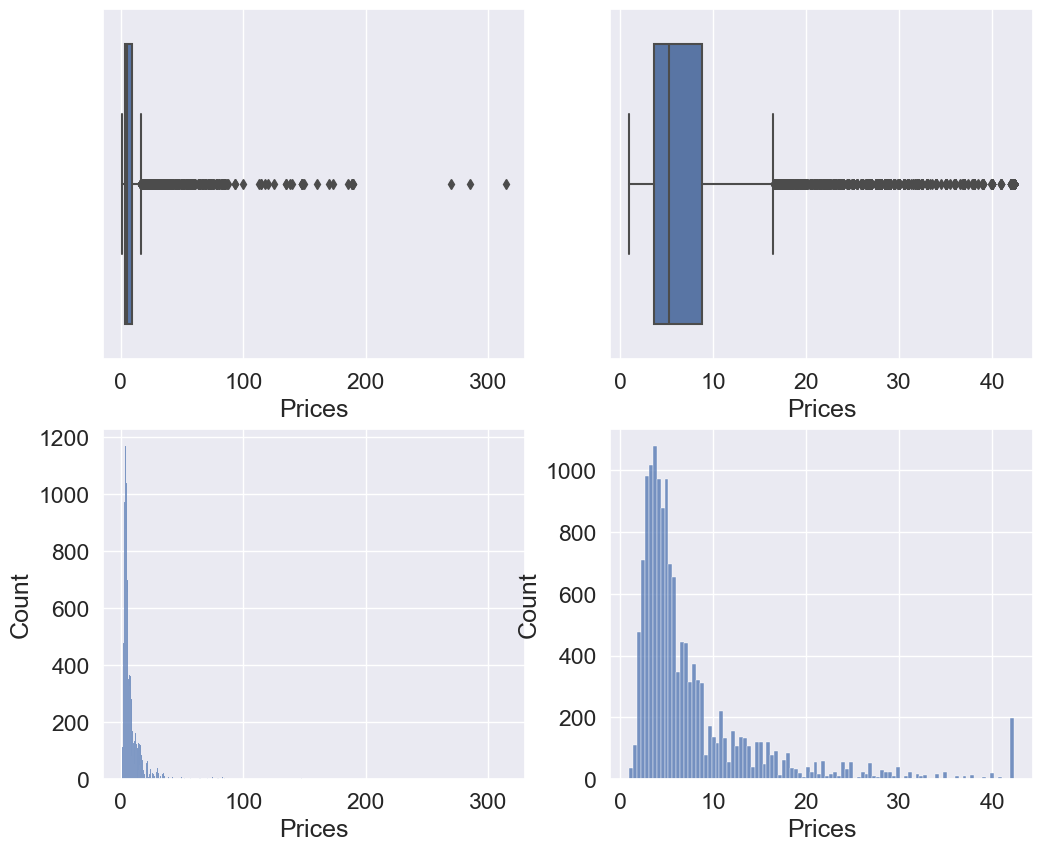

In [897]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices',ax=axes[1][1])

In [898]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 278.4249120490538


In [899]:
df.loc[(df.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

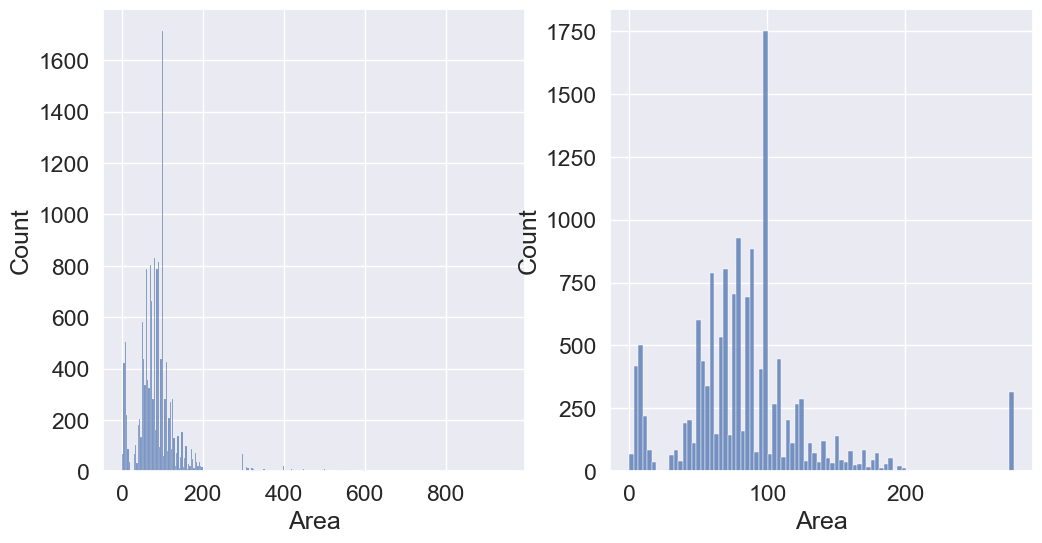

In [900]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df,x='Area',ax=axes[1])

In [901]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 8.636924673324726


In [902]:
df.loc[(df.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

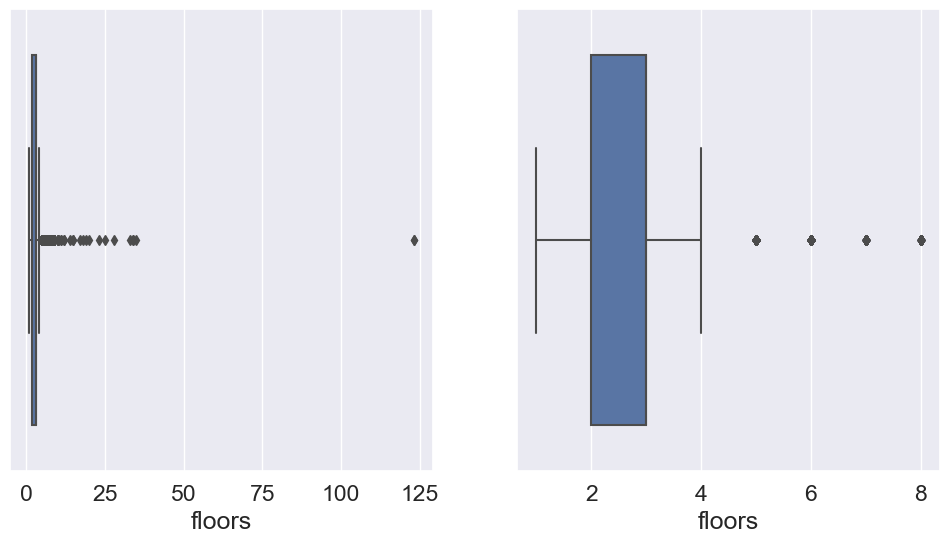

In [903]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df,x='floors',ax=axes[1])

In [904]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 21.28694581336954


<Axes: xlabel='width'>

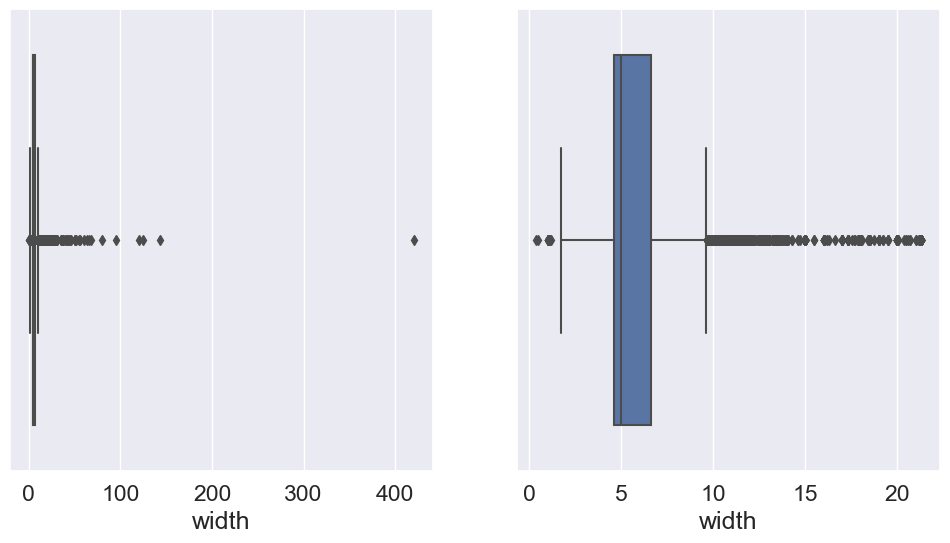

In [905]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df,x='width',ax=axes[1])

In [906]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 88.45288630811173


<Axes: xlabel='length'>

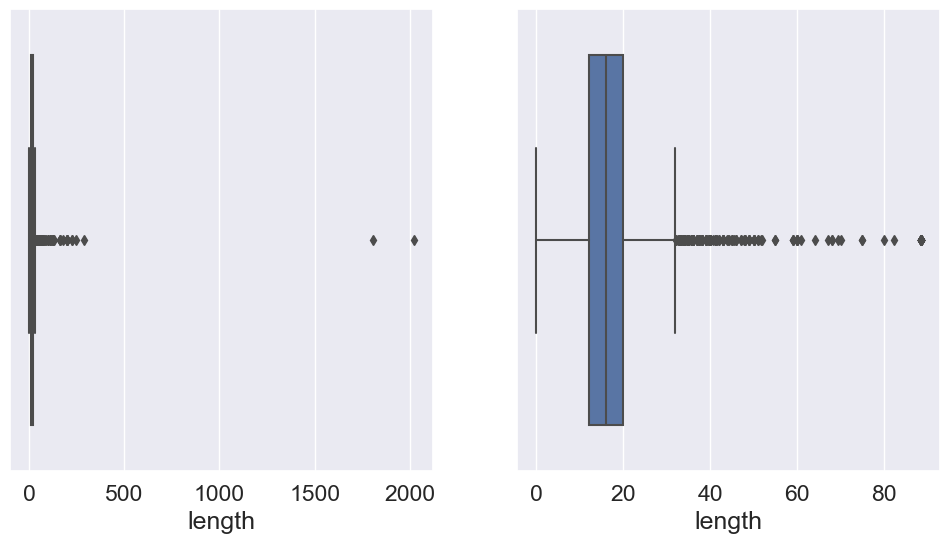

In [907]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df,x='length',ax=axes[1])

## Feature Transformation

In [908]:
data=df.copy()

In [909]:
import scipy.stats as stat
def plot_data(feature):
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    stat.probplot(data[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,3)
    sns.histplot(data[feature])

    plt.subplot(2,2,4)
    sns.histplot(df[feature])
    
    plt.show()

Chuẩn hóa các trường Area, width, length với chuẩn hóa Normalizer

In [910]:
from sklearn.preprocessing import MaxAbsScaler,Normalizer,StandardScaler,RobustScaler,PowerTransformer
scaler = StandardScaler()
temp = df[['Area','width','length']]
df.loc[:,['Area','width','length']] = (scaler.fit_transform(temp))

# temp

Chuẩn hóa trường Prices với phương pháp chuẩn hóa PowerTransformer

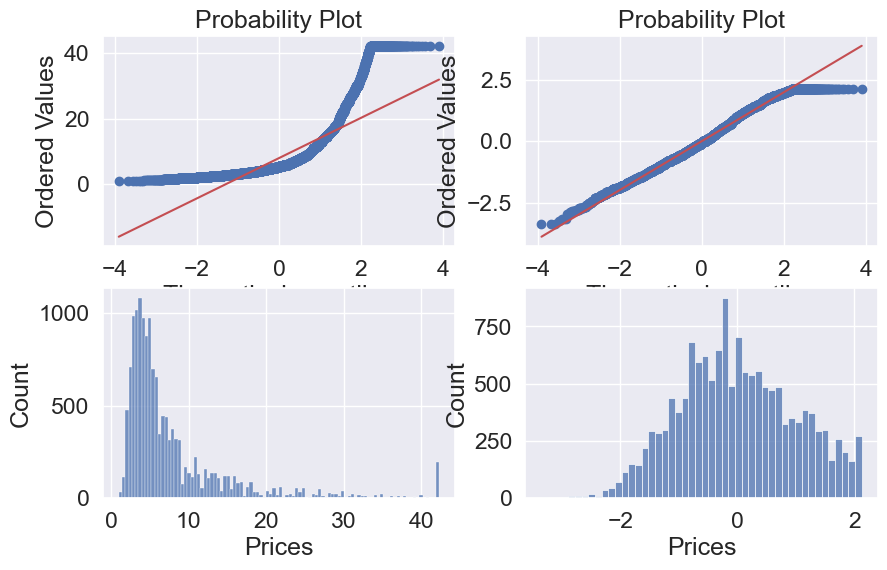

In [911]:

df['Prices'] = PowerTransformer().fit_transform(df[['Prices']])

plot_data('Prices')

<Axes: xlabel='Area', ylabel='Prices'>

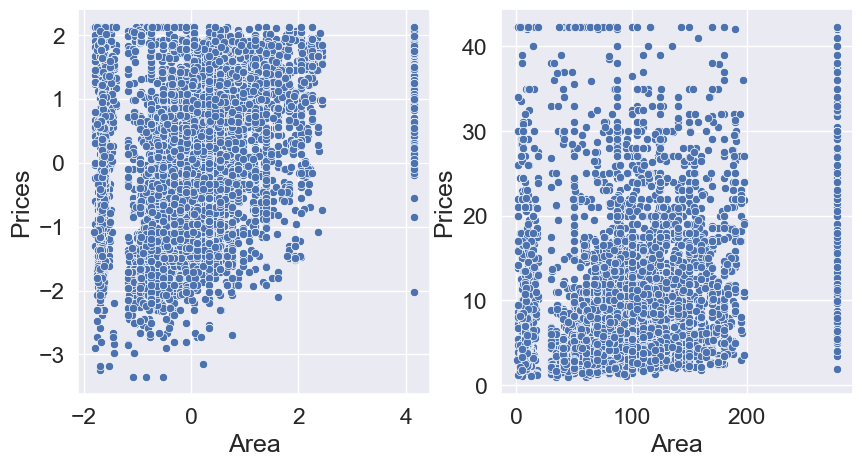

In [912]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='Area',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='Area',y='Prices',ax=axes[1])

<Axes: xlabel='width', ylabel='Prices'>

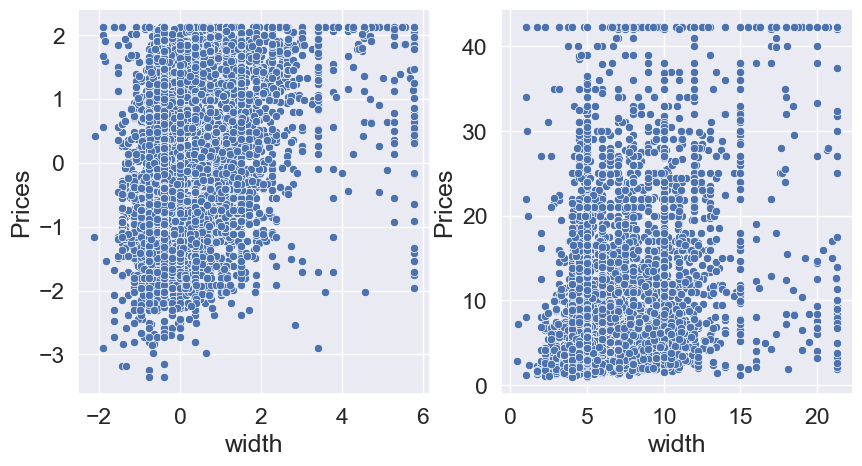

In [913]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='width',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='width',y='Prices',ax=axes[1])

<Axes: xlabel='length', ylabel='Prices'>

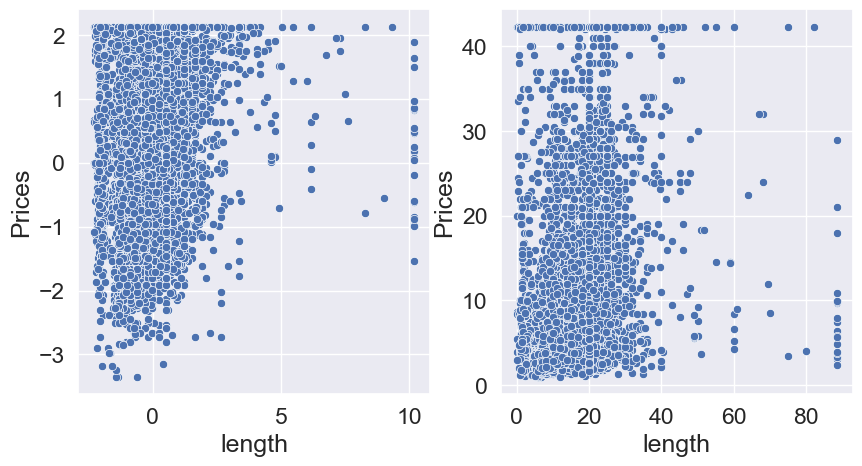

In [914]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df,x='length',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='length',y='Prices',ax=axes[1])

In [915]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Hà Mục,Hòa Thọ Đông,cẩm lệ,-0.109935,0.331876,Tây Nam,Nhà mặt tiền,Không có,-0.384833,0.532496,4
1,Thi Sách,Hòa Thuận Tây,hải châu,-0.504485,0.010225,Không,Nhà mặt tiền,Không có,1.214177,-0.987467,1
2,Ông Ích Khiêm,Tam Thuận,thanh khê,0.974593,-0.375756,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,-0.839577,0.198567,3
3,Núi Thành,Hòa Cường Bắc,hải châu,1.469697,1.125282,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,0.486759,0.358670,3
4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,0.371615,0.117442,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,-0.384833,0.250511,4


## Feature Selection (QKhang)

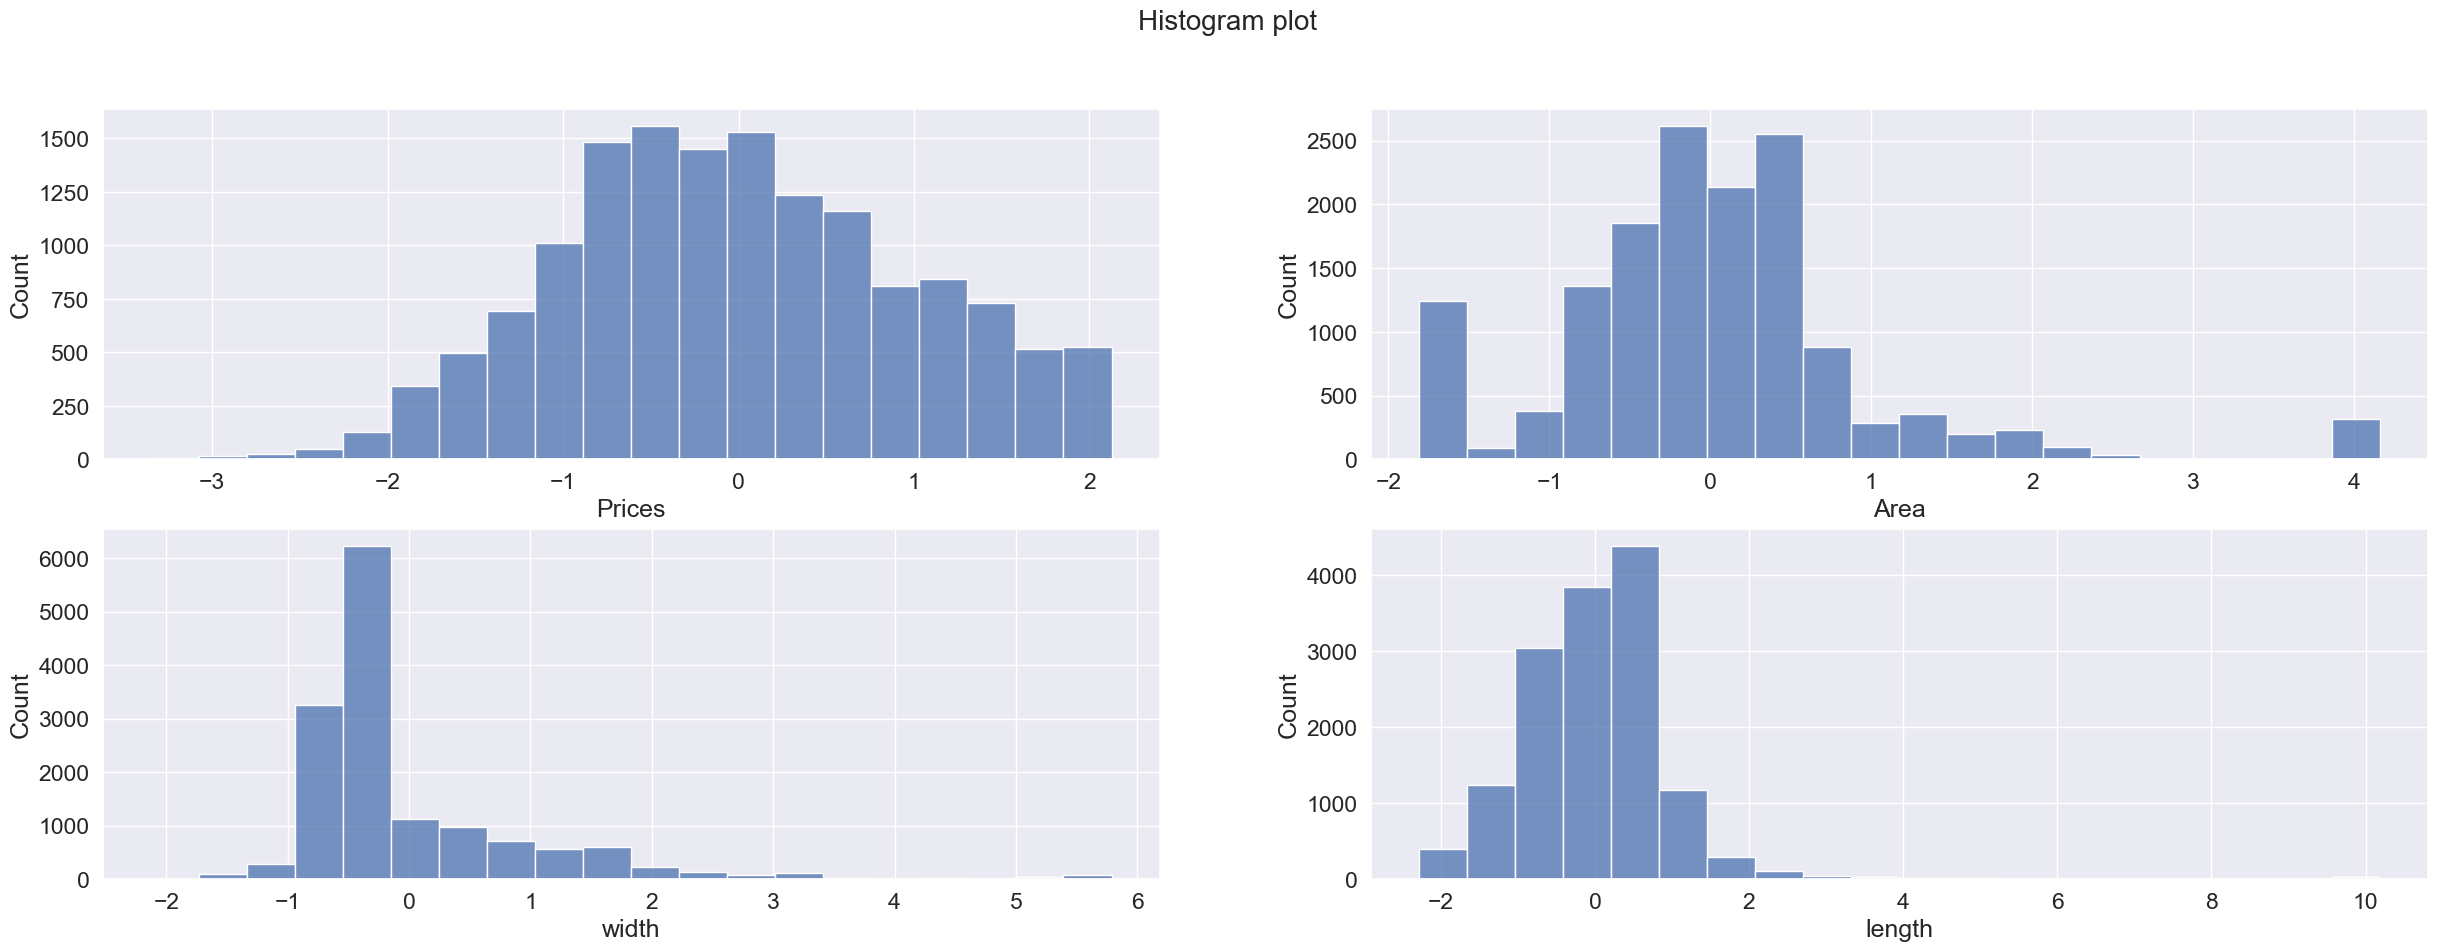

In [916]:
NummericData = ['Prices','Area','width','length']
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,2, i[0]+1)
    sns.histplot(x=df[i[1]], ax = axe, bins=20)

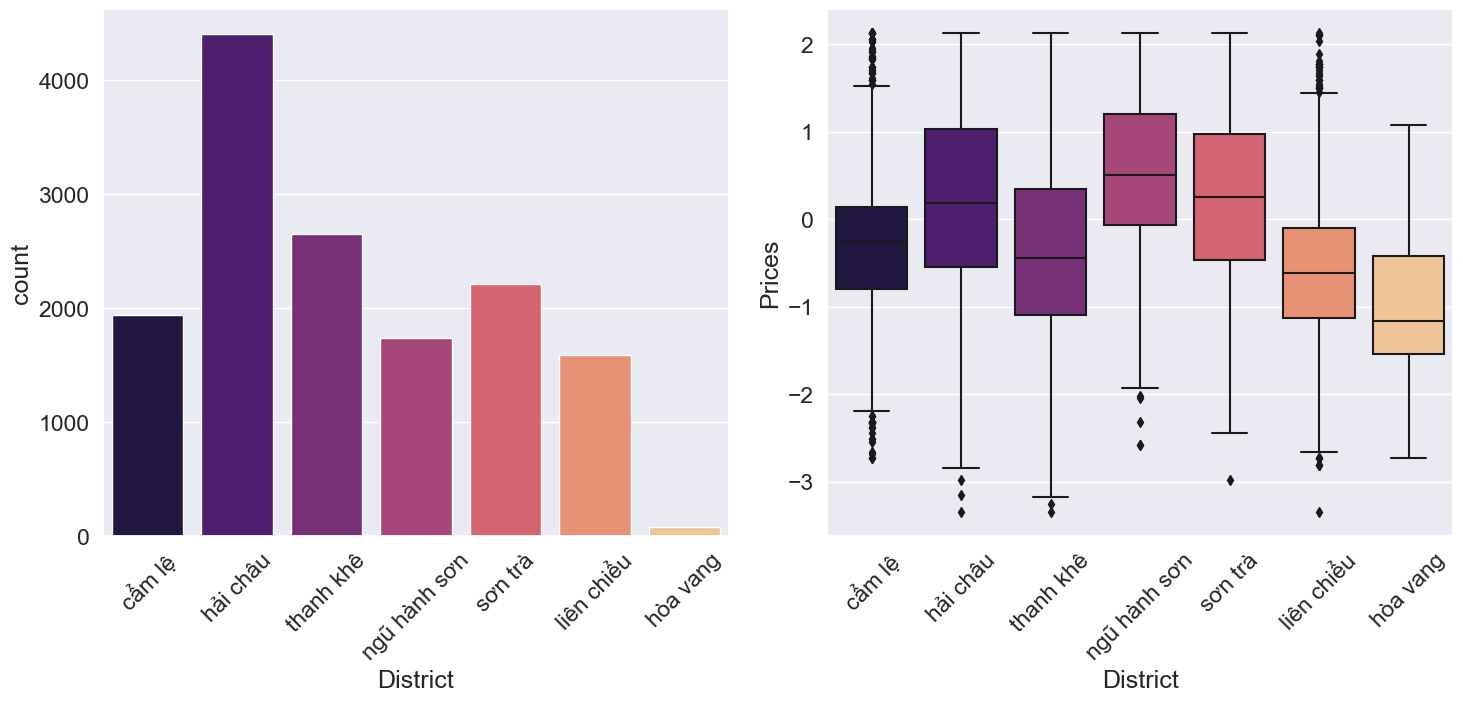

In [917]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("magma"))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.Prices, palette=("magma"))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

Nhận xét:
- Nhận thấy rằng Số lượng nhà ở quận Hải Châu là nhiều nhất

- Giá nhà ở quận Ngũ Hành Sơn là cao nhất

Vì vậy giá nhà và vị trí quận huyện tương quan với nhau

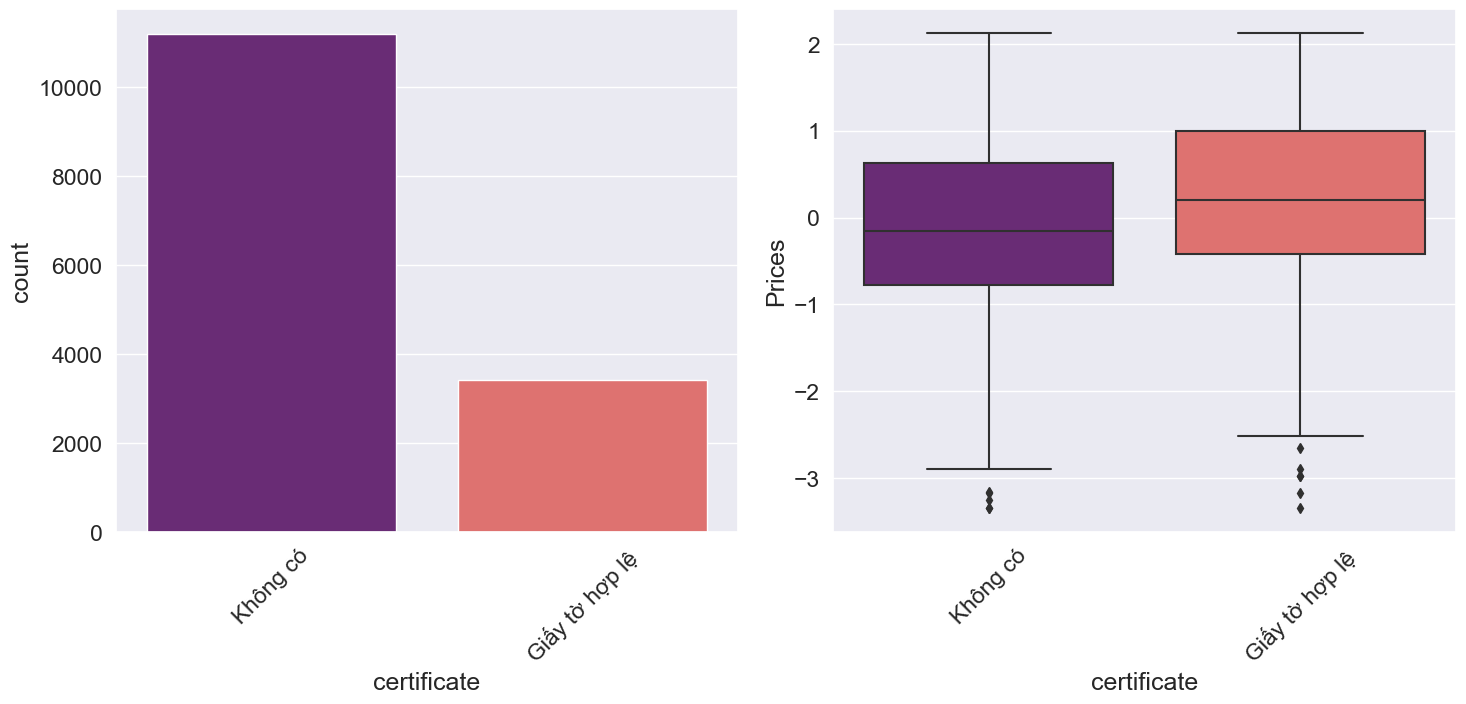

In [918]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

Nhận xét:
- Nhà có giấy tờ đầy đủ thì có giá bán cao hơn nhà không có giấy tờ

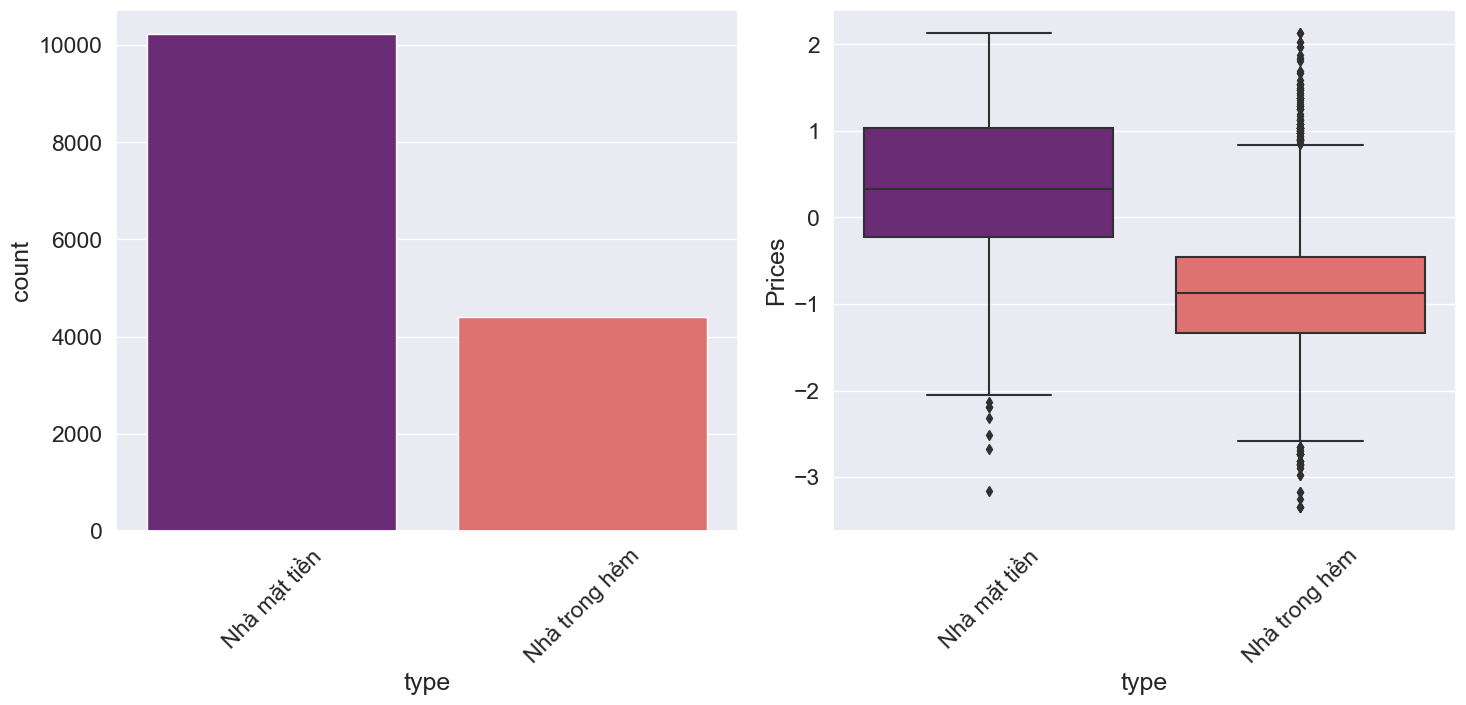

In [919]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

Nhận xét:

- Những nhà ở mặt tiền thì có giá cao bơn những nhà ở trong hẻm

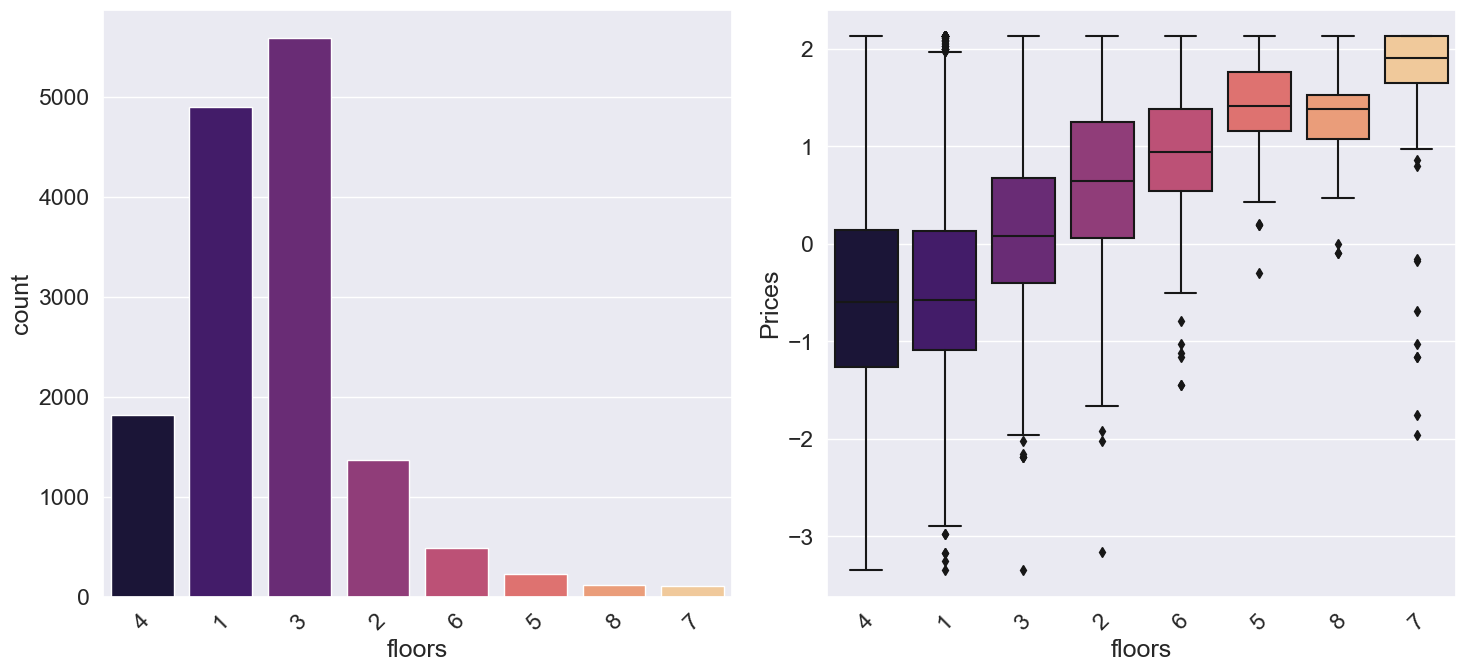

In [920]:
plt.figure(figsize=(15,20))
plot_count('floors', 1)
plt.tight_layout()

Nhận xét:
- Nhà 1 và 2 tầng được bán nhiều nhất
- Nhà cành nhiều tầng thì giá càng cao

floors tương quan với Prices

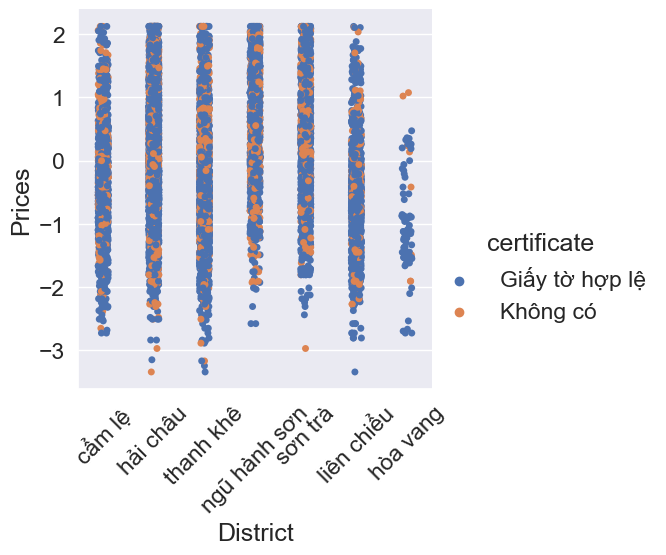

In [921]:
axis = sns.catplot(data= df,x='District',y='Prices',hue='certificate')
axis.set_xticklabels(df['District'].unique(), rotation = 45)

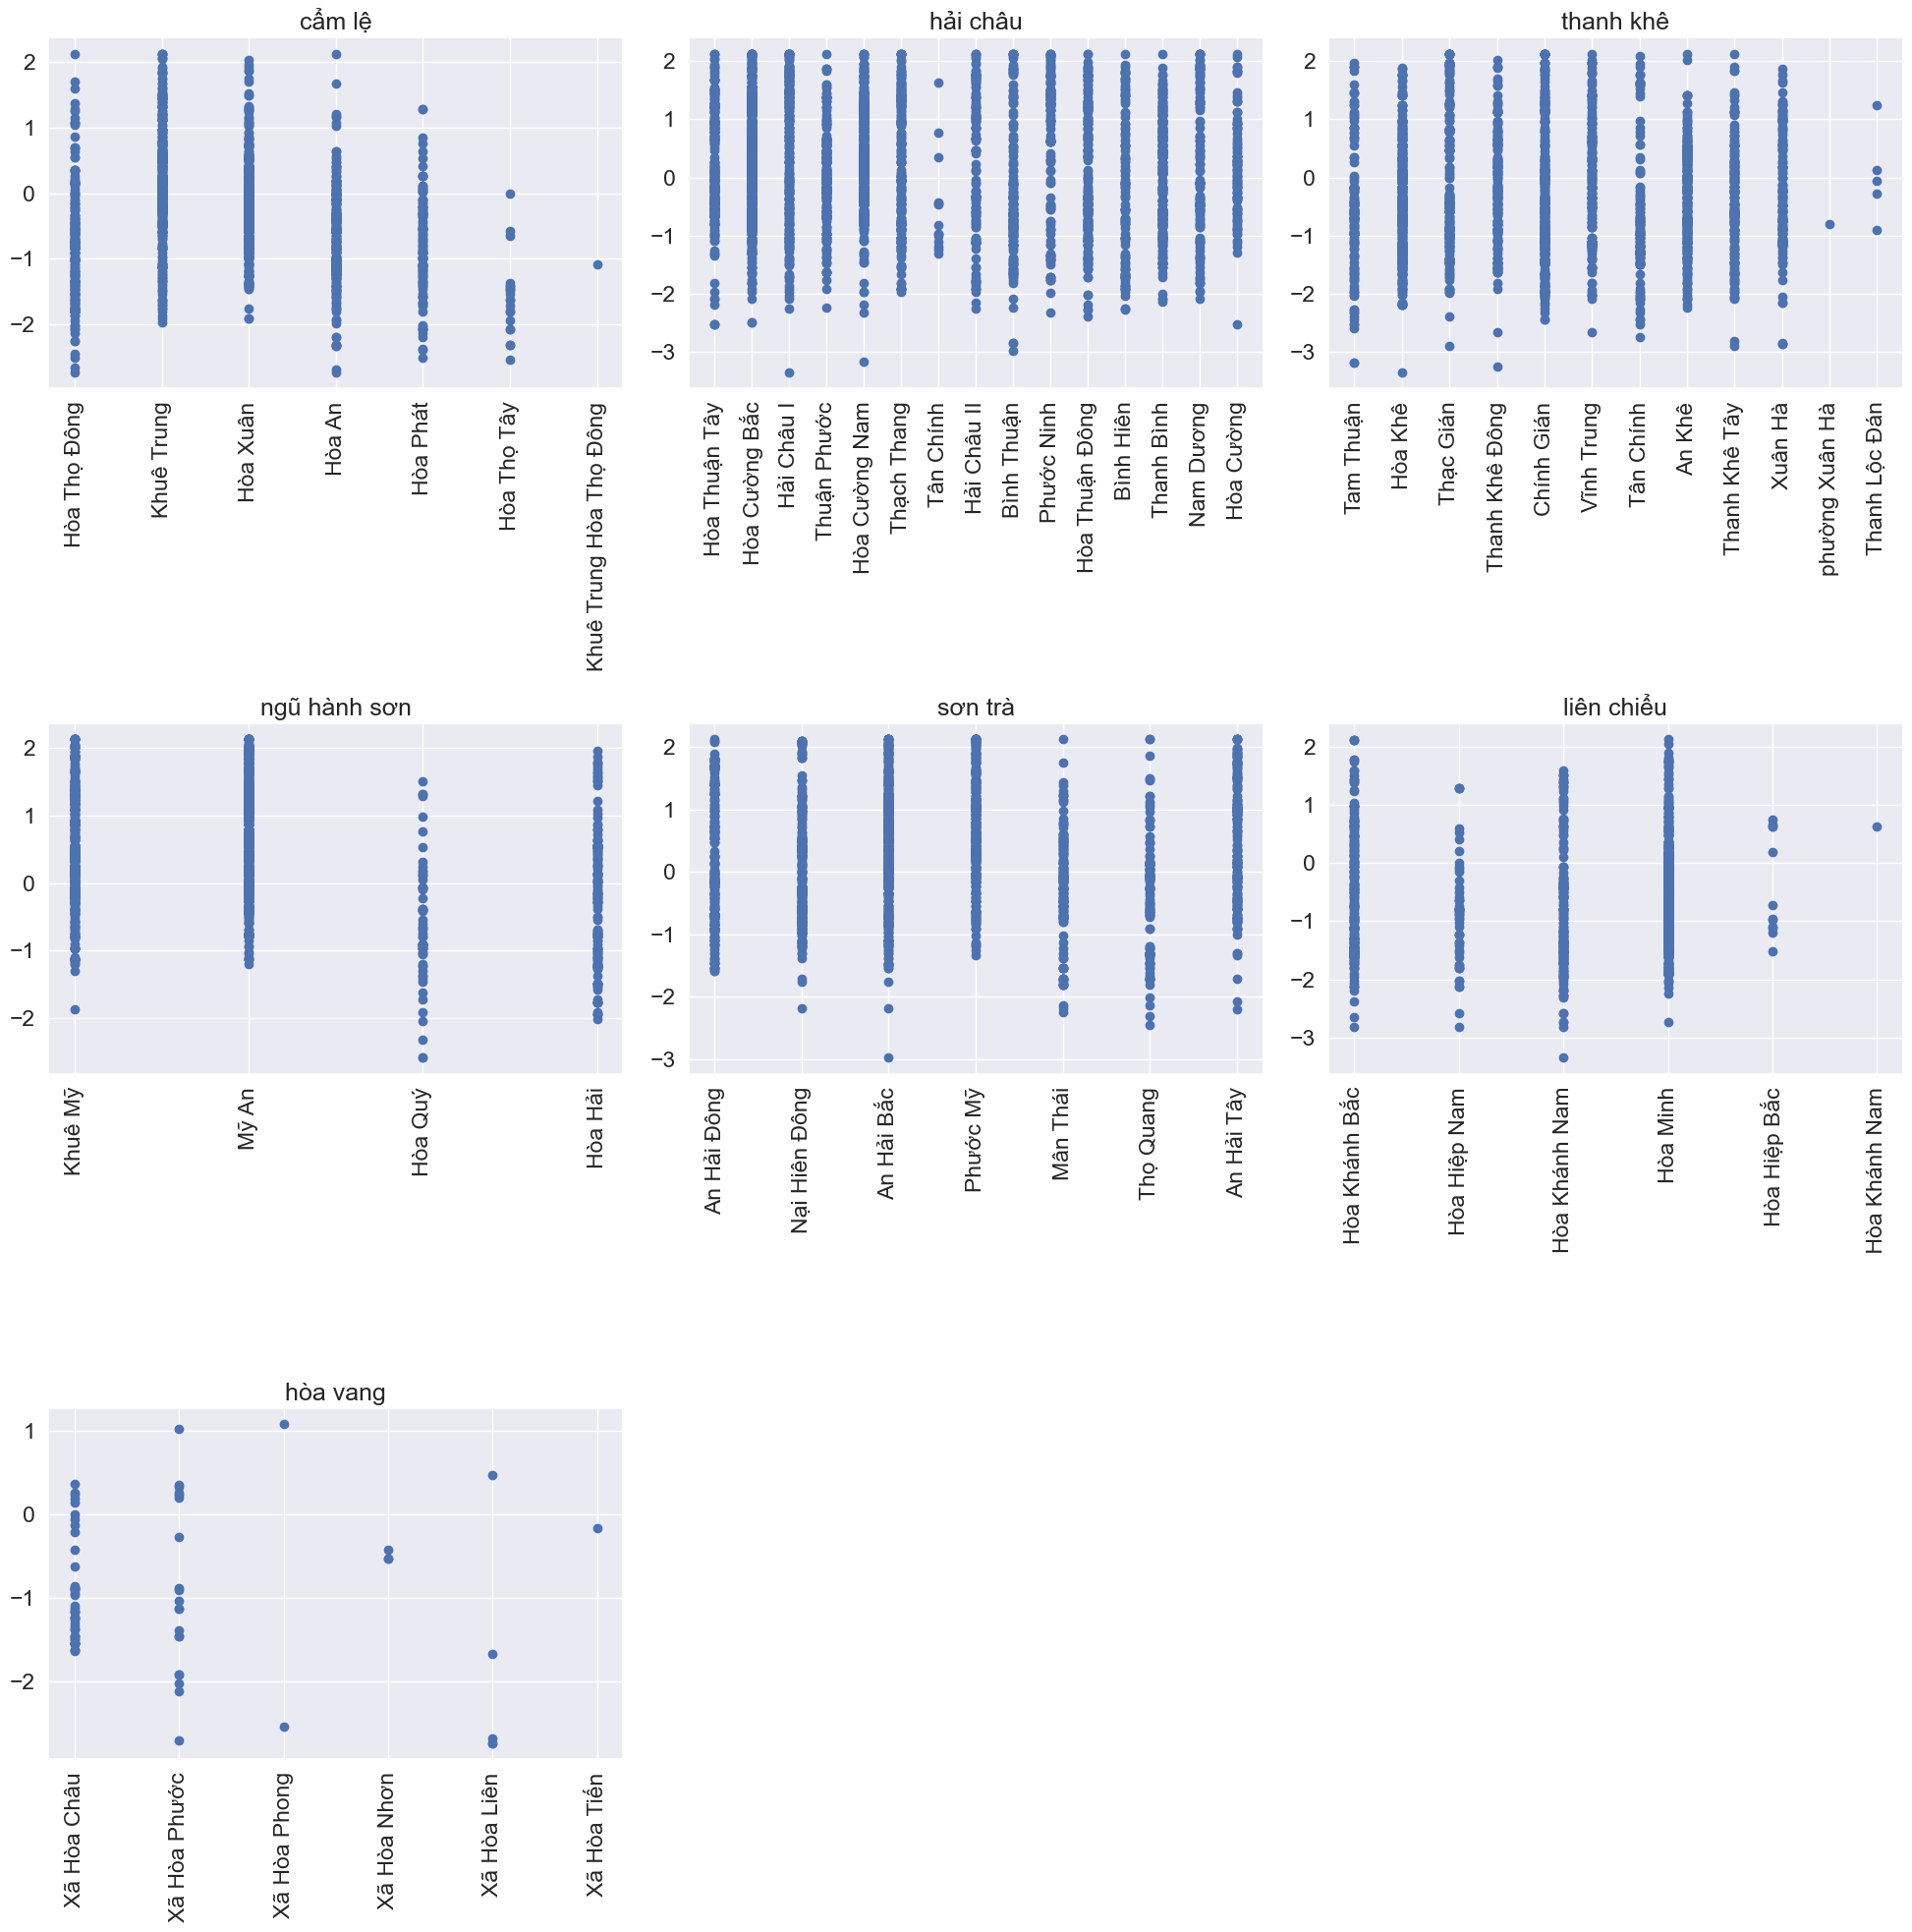

In [922]:

count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()


Nhận xét:
- Nhà ở các phường khác nhau thì có giá khác nhau

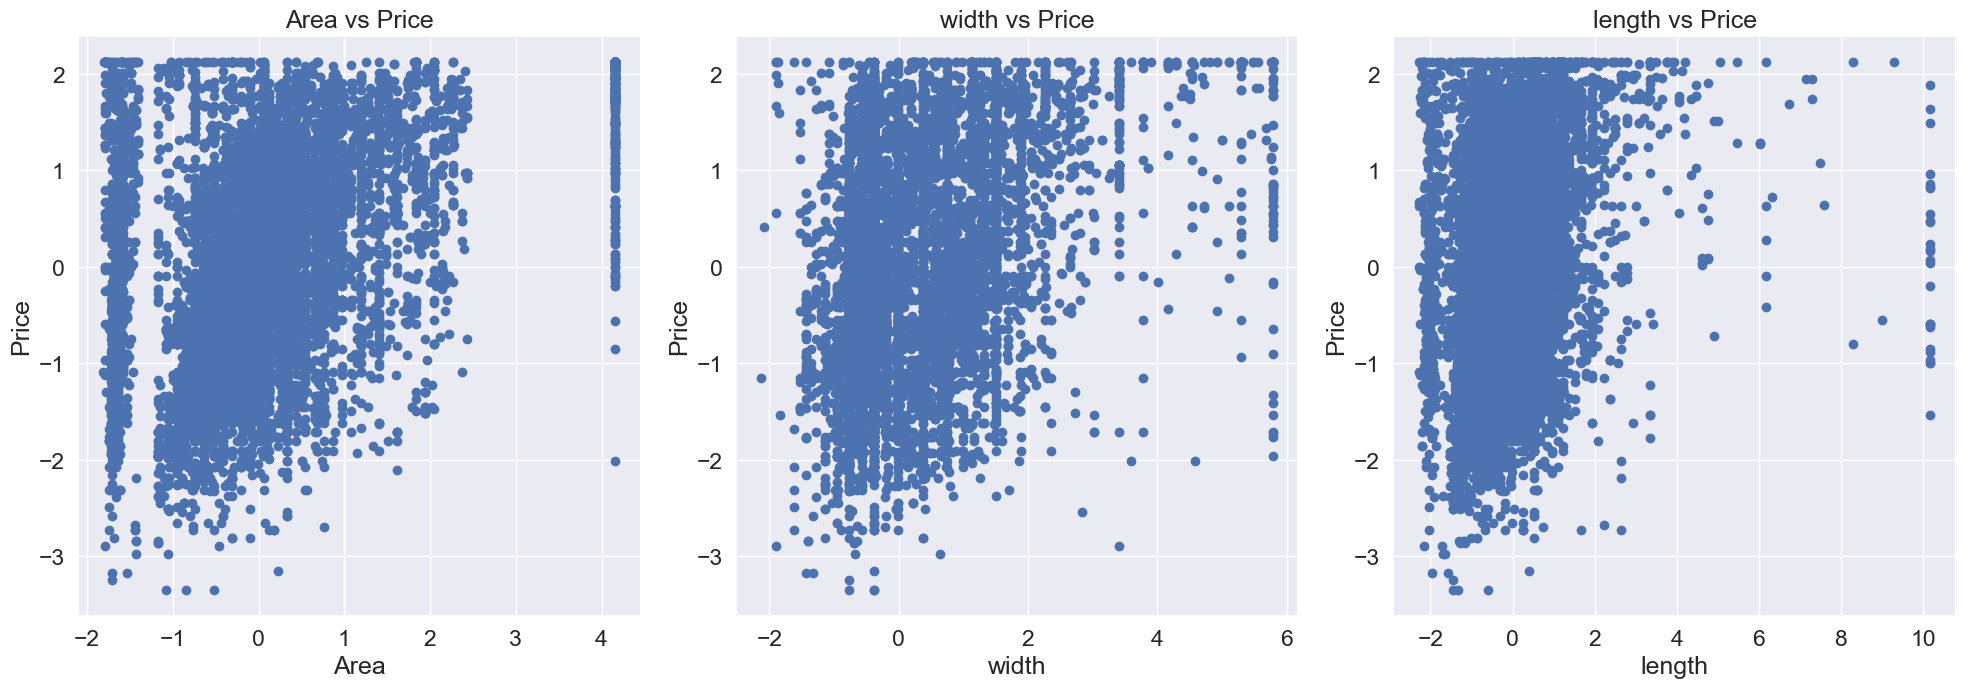

In [923]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['Prices'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area', 1)
scatter('width', 2)
scatter('length', 3)

plt.tight_layout()

<Axes: >

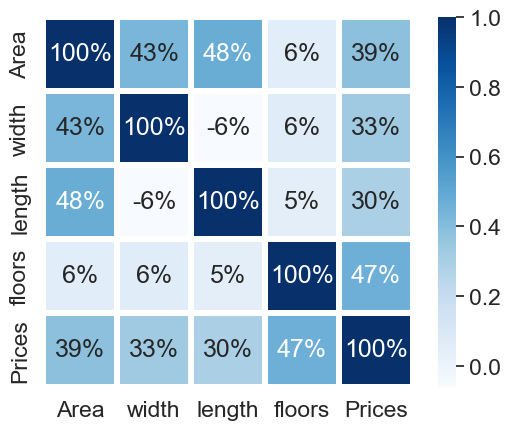

In [924]:
cols_pv = ['Area','width','length','floors','Prices']

sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")


<h2>Kết Luận</h2>

Các biến ảnh hưởng đến Prices:

- Are
- length
- width
- District
- certificate
- floors
- type

## Lable Encoding

In [925]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Chuyển dữ liệu trường District về dạnh số

- cẩm lệ -> 0
- hải châu -> 1
- thanh khê -> 2
- ngũ hành sơn -> 3
- sơn trà -> 4
- liên chiểu -> 5
- hòa vang -> 6

In [926]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

df['District'] = le.fit_transform(df['District'])


In [927]:
type_map = {'Nhà trong hẻm':0,'Nhà mặt tiền':1}
df['type']=le.fit_transform(df['type'].map(type_map))

In [928]:
df['certificate']= le.fit_transform(df['certificate'])

In [929]:
df.head(5)

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Hà Mục,Hòa Thọ Đông,0,-0.109935,0.331876,Tây Nam,1,1,-0.384833,0.532496,4
1,Thi Sách,Hòa Thuận Tây,2,-0.504485,0.010225,Không,1,1,1.214177,-0.987467,1
2,Ông Ích Khiêm,Tam Thuận,6,0.974593,-0.375756,Tây,1,0,-0.839577,0.198567,3
3,Núi Thành,Hòa Cường Bắc,2,1.469697,1.125282,Tây,1,0,0.486759,0.358670,3
4,Trương Văn Hiến,Khuê Mỹ,4,0.371615,0.117442,Đông Nam,1,0,-0.384833,0.250511,4


# Chia Train/Test

In [930]:
from sklearn.model_selection import train_test_split
house = df[['Prices','District','Area','type','certificate','width','length','floors']]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=42)

print(df_train.shape)
print(df_test.shape)

(11689, 8)
(2923, 8)


In [931]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (11689, 8)
X_test: (2923, 8)


In [932]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (11689,)
y_test: (2923,)


# Linear Regression (Trinh)

In [933]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
# Dự đoán
predictions_LR  = model_LR.predict(X_test)
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_LR[:10]
}

df_predict = pd.DataFrame(rs)
print(df_predict)

       Price_Test  Price_Predict
13134    0.543526       0.903680
6681    -0.571794      -0.721927
10554    1.383244       0.374342
1353     1.207650       0.540335
11395   -0.031773       0.108771
6867     2.125761      -0.043948
2736    -0.461375      -0.724034
2470    -1.413031      -0.969190
9066    -0.691678      -0.896116
7108     0.306465       0.233499


In [934]:
from sklearn.metrics import r2_score 
r2_score_LR = r2_score(y_test,predictions_LR)
print(r2_score_LR)

0.5850938573011915


In [935]:
from sklearn.metrics import mean_squared_error 
import numpy as np

rmse_LR = np.sqrt(mean_squared_error(y_test, predictions_LR))
print(rmse_LR)

0.6473797124882201


In [936]:
from sklearn.metrics import mean_absolute_error

mae_LR = mean_absolute_error(y_test, predictions_LR)
print(mae_LR)

0.5053812479448992


In [937]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Tạo dữ liệu huấn luyện và nhãn tương ứng


# Khởi tạo mô hình Random Forest Regression
model = LinearRegression()

# Áp dụng cross-validation với 5 folds
scores = cross_val_score(model,X_train, y_train, cv=5)

# In kết quả của các fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# In kết quả trung bình của cross-validation
print("Average Score:", np.mean(scores))


Fold 1: 0.5655529968138846
Fold 2: 0.5687844737682477
Fold 3: 0.6028257797396788
Fold 4: 0.5578756220402503
Fold 5: 0.5840440063609329
Average Score: 0.5758165757445989


In [938]:
data_LR = {'y_test': y_test, 'y_prediction': predictions_LR}
data_LR = pd.DataFrame(data = data_LR)

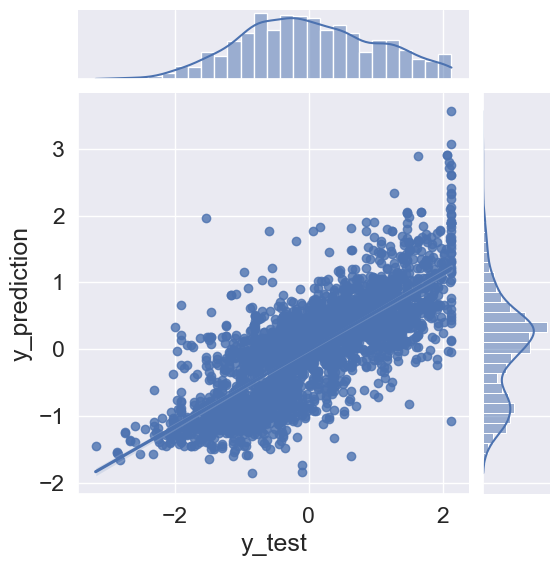

In [939]:
#Linear Regression
sns.jointplot(data = data_LR, x="y_test", y="y_prediction", kind='reg')

# Tìm siêu tham số cho mô hình linear regression

Các siêu tham số quan trọng nhất trong mô hình Linear Regression bao gồm:

- Intercept (fit_intercept): Siêu tham số này quyết định liệu mô hình có sử dụng điểm cắt với trục y hay không. Nếu fit_intercept=True, mô hình sẽ có một điểm cắt với trục y. Nếu fit_intercept=False, mô hình sẽ đi qua gốc tọa độ (0,0). Mặc định, fit_intercept=True.

- Tham số copy_X quyết định liệu có sao chép (copy) các dữ liệu đầu vào (X) hay không. Nếu copy_X=True, dữ liệu đầu vào sẽ được sao chép trước khi huấn luyện mô hình để đảm bảo rằng dữ liệu gốc không bị thay đổi. Nếu copy_X=False, dữ liệu đầu vào sẽ được sử dụng trực tiếp. Mặc định, copy_X=True.

- Tham số positive quyết định liệu các hệ số trong mô hình Linear Regression có bị giới hạn là các giá trị dương hay không. Nếu positive=True, các hệ số sẽ bị giới hạn là các giá trị dương. Tham số này thường được sử dụng trong các bài toán mà các biến độc lập phải có ảnh hưởng dương đối với biến phụ thuộc. Mặc định, positive=False.


In [940]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Khởi tạo mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Thiết lập các giá trị tham số để thử nghiệm
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False],
              'n_jobs':[1,2,3]}

# Sử dụng Grid Search để tìm kiếm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best score: 0.575816575744599


## Áp dụng siêu tham số vào mô hình

In [941]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Tạo dữ liệu huấn luyện và nhãn tương ứng


# Khởi tạo mô hình Random Forest Regression
model = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = True)

# Áp dụng cross-validation với 5 folds
scores = cross_val_score(model,X_train, y_train, cv=5)

# In kết quả của các fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# In kết quả trung bình của cross-validation
print("Average Score:", np.mean(scores))


Fold 1: 0.5655529968138845
Fold 2: 0.5687844737682469
Fold 3: 0.6028257797396803
Fold 4: 0.5578756220402503
Fold 5: 0.5840440063609333
Average Score: 0.575816575744599


Kết luận: Áp dụng siêu tham số vào mô hình không giúp tăng độ chính xác cho mô hình linear regression 

In [942]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Dùng LinerRegression
# model_LR = LinearRegression()
# model_LR.fit(X_train, y_train)

In [943]:
# predictions_LR  = model_LR.predict(X_test)

In [944]:
# from sklearn.metrics import r2_score
# r2_score_LR = r2_score(y_test,predictions_LR)
# print(r2_score_LR)

In [945]:
# rs = {
#   "Price_Test": y_test[:10],
#   "Price_Predict": predictions_LR[:10]
# }

# df_t = pd.DataFrame(rs)
# print(df_t)


# Random Forest Regressor (QKhang)

In [946]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)

In [947]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# kfold = KFold(n_splits=10)
# kfold = kfold.split(X_train, y_train)
# rmses = []

# for k, (i_train, i_test) in enumerate(kfold):
#     model_RD.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
#     rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train.iloc[i_test, :]))**0.5
#     rmses.append(rmse)
#     print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
# print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

In [948]:
# from sklearn.model_selection import cross_val_score

# # Tạo dữ liệu huấn luyện và nhãn tương ứng


# # Khởi tạo mô hình Random Forest Regression
# model = RandomForestRegressor()

# # Áp dụng cross-validation với 5 folds
# scores = cross_val_score(model,X_train, y_train, cv=5)

# # In kết quả của các fold
# for i, score in enumerate(scores):
#     print(f"Fold {i+1}: {score}")

# # In kết quả trung bình của cross-validation
# print("Average Score:", np.mean(scores))


In [949]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# # Tạo dữ liệu huấn luyện và nhãn tương ứng


# # Khởi tạo mô hình Random Forest Regression
# model = LinearRegression()

# # Áp dụng cross-validation với 5 folds
# scores = cross_val_score(model,X_train, y_train, cv=5)

# # In kết quả của các fold
# for i, score in enumerate(scores):
#     print(f"Fold {i+1}: {score}")

# # In kết quả trung bình của cross-validation
# print("Average Score:", np.mean(scores))


# Decision Tree Regression (Đức)

# Đánh giá 3 thuật theo các metrics (Đức)